Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,393,610 (28.20 MB)

 Trainable params: 7,393,610 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 754ms/step - accuracy: 0.1036 - loss: 3.6134 - val_accuracy: 0.1300 - val_loss: 2.3153 - learning_rate: 0.0010
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 677ms/step - accuracy: 0.1842 - loss: 2.2563 - val_accuracy: 0.0900 - val_loss: 2.3102 - learning_rate: 0.0010
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 506ms/step - accuracy: 0.2650 - loss: 2.2394 - val_accuracy: 0.1350 - val_loss: 2.3097 - learning_rate: 0.0010
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 520ms/step - accuracy: 0.3070 - loss: 2.1261 - val_accuracy: 0.1300 - val_loss: 2.3510 - learning_rate: 0.0010
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 520ms/step - accuracy: 0.3851 - loss: 1.8523 - val_accuracy: 0.1200 - val_loss: 2.3858 - learning_rate: 0.0010
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 516ms/step - accuracy: 0.4964 - loss: 1.6373 - val_accuracy: 0.0400 - val_loss: 2.3839 - learning_rate: 0.0010
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 569ms/step - accuracy: 0.6498 - loss: 1.2456 - val_accuracy: 

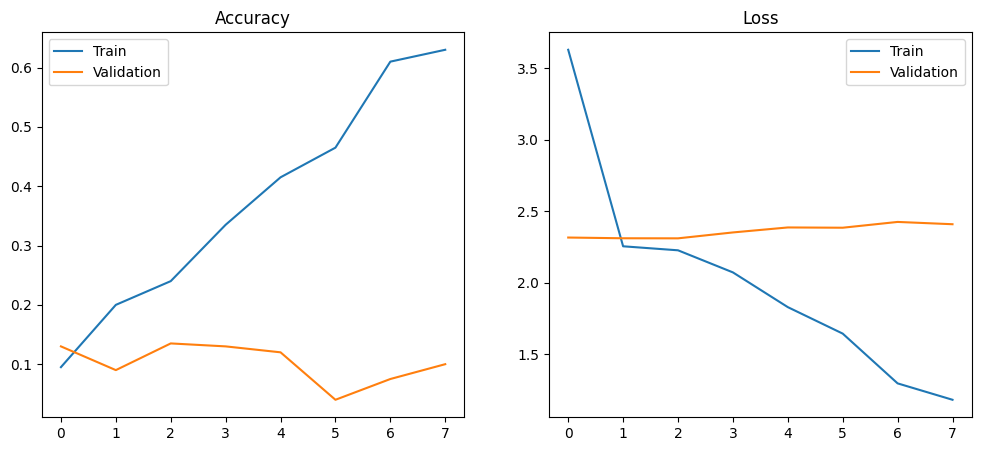

In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import f1_score, roc_auc_score
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# --------------------------- Configuration ---------------------------
train_path = '/kaggle/input/ucf-crime-dataset/Train'
test_path = '/kaggle/input/ucf-crime-dataset/Test'
batch_size = 32
img_size = (128, 128)  # Reduced from 240x240 for efficiency
num_classes = 10  # Update with actual class count

# --------------------------- Image Data Generator ---------------------------
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import f1_score, roc_auc_score
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# --------------------------- Configuration ---------------------------
train_path = '/kaggle/input/ucf-crime-dataset/Train'
test_path = '/kaggle/input/ucf-crime-dataset/Test'
batch_size = 32
img_size = (128, 128)
num_classes = 10
images_per_class = 20  # Added parameter

# --------------------------- Modified Image Data Generator ---------------------------
class ImageDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, base_path, batch_size, img_size, num_classes):
        self.batch_size = batch_size
        self.img_size = img_size
        self.num_classes = num_classes
        
        # Collect image paths and labels
        self.image_paths = []
        self.labels = []
        
        # Get class folders
        self.classes = sorted([
            d for d in os.listdir(base_path) 
            if os.path.isdir(os.path.join(base_path, d))
        ])[:num_classes]

        for class_idx, class_name in enumerate(self.classes):
            class_path = os.path.join(base_path, class_name)
            
            # Get first 20 images in class directory
            images = [
                os.path.join(class_path, f) 
                for f in os.listdir(class_path) 
                if f.lower().endswith(('.png', '.jpg', '.jpeg'))
            ][:images_per_class]  # Modified line
            
            self.image_paths.extend(images)
            self.labels.extend([class_idx] * len(images))

        # Shuffle data
        self.indices = np.arange(len(self.image_paths))
        np.random.shuffle(self.indices)

    # Rest of the class remains the same
    # ... [keep other methods unchanged]

# --------------------------- Rest of the code remains identical ---------------------------
# ... [keep model architecture, training, and evaluation the same]
    def __len__(self):
        return int(np.ceil(len(self.image_paths) / self.batch_size))

    def __getitem__(self, index):
        batch_indices = self.indices[
            index*self.batch_size : (index+1)*self.batch_size
        ]
        
        batch_images = []
        batch_labels = []
        
        for i in batch_indices:
            img = load_img(self.image_paths[i], target_size=self.img_size)
            img_array = img_to_array(img) / 255.0
            batch_images.append(img_array)
            batch_labels.append(self.labels[i])
        
        return np.array(batch_images), tf.keras.utils.to_categorical(batch_labels, num_classes=self.num_classes)

# --------------------------- CNN Model Architecture ---------------------------
def build_image_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs, outputs)
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# --------------------------- Execution ---------------------------
# Initialize generators
train_gen = ImageDataGenerator(train_path, batch_size, img_size, num_classes)
test_gen = ImageDataGenerator(test_path, batch_size, img_size, num_classes)

# Build model
model = build_image_model((*img_size, 3), num_classes)
model.summary()

# Callbacks
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.5, patience=3)
]

# Training
history = model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=30,
    callbacks=callbacks,
    verbose=1
)

# --------------------------- Evaluation ---------------------------
loss, accuracy = model.evaluate(test_gen)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Predictions
y_pred = model.predict(test_gen)
y_true = np.concatenate([np.argmax(test_gen[i][1], axis=1) for i in range(len(test_gen))])

# Metrics
print(f"F1 Score: {f1_score(y_true, np.argmax(y_pred, axis=1), average='macro'):.4f}")
print(f"AUC Score: {roc_auc_score(tf.keras.utils.to_categorical(y_true, num_classes), y_pred, multi_class='ovr'):.4f}")

# Plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()
plt.show()